In [21]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Read data
# TODO: replace with path to cleaned data
DATA_PATH = "../cleaned_output.csv"
data = pd.read_csv(DATA_PATH)
data.head()

,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q3: In what setting would you expect this food to be served? Please check all that apply,Q4: How much would you expect to pay for one serving of this food item?,Q5: What movie do you think of when thinking of this food item?,Q6: What drink would you pair with this food item?,"Q7: When you think about this food item, who does it remind you of?",Q8: How much hot sauce would you add to this food item?,Label
0,716549,3,6.0,"Week day lunch,At a party,Late night snack",5.0,cloudy with a chance of meatballs,coca cola,Friends,A little (mild),Pizza
1,715742,4,2.0,"Week day lunch,At a party,Late night snack",5.0,all sort of american young boy movies,coca cola,"Friends,Teachers,Strangers",NaN,Pizza
2,727333,3,5.0,"Week day lunch,Week day dinner,Weekend lunch,W...",NaN,action movie,coca cola,Friends,A moderate amount (medium),Pizza
3,606874,4,6.5,"Week day lunch,Week day dinner,Weekend lunch,W...",3.0,mamma mia,pop,"Siblings,Friends,Teachers",I will have some of this food item with my hot...,Pizza
4,505318,2,3.0,"Week day lunch,Week day dinner,Weekend lunch,W...",5.0,cloudy with a chance of meatballs,pop,"Siblings,Friends",A little (mild),Pizza


In [23]:
# Expected data:
# Q1: Categorical, complexity to make the food
# Q2: Numerical, number of ingredients
# Q3: Categorical, setting where the food is served
# Q4: Numerical, cost of the food
# Q5: Categorical, what movie goes with the food
# Q6: Categorical, what drink goes with the food
# Q7: Categorical, what people goes with the food
# Q8: Categorical, how much hot sauce

<Figure size 640x480 with 0 Axes>

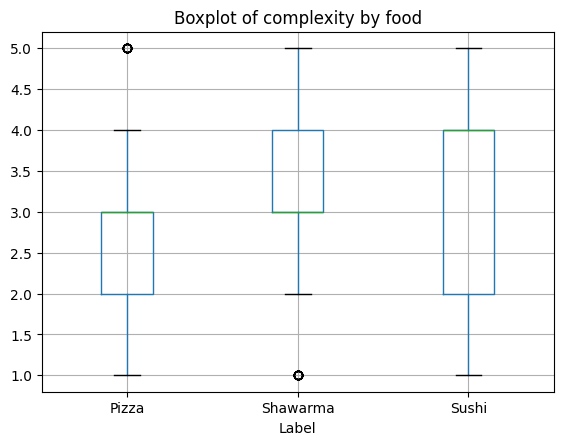

In [24]:
# Plot a bar, where each boxplot corresponds to a different food
plt.figure()
data.boxplot(column='Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)', by='Label')
plt.title(f"Boxplot of complexity by food")
plt.suptitle("")
plt.show()


/var/folders/rt/x1pynv8j1fb1hkbhs6y9v62m0000gn/T/ipykernel_17728/792564141.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


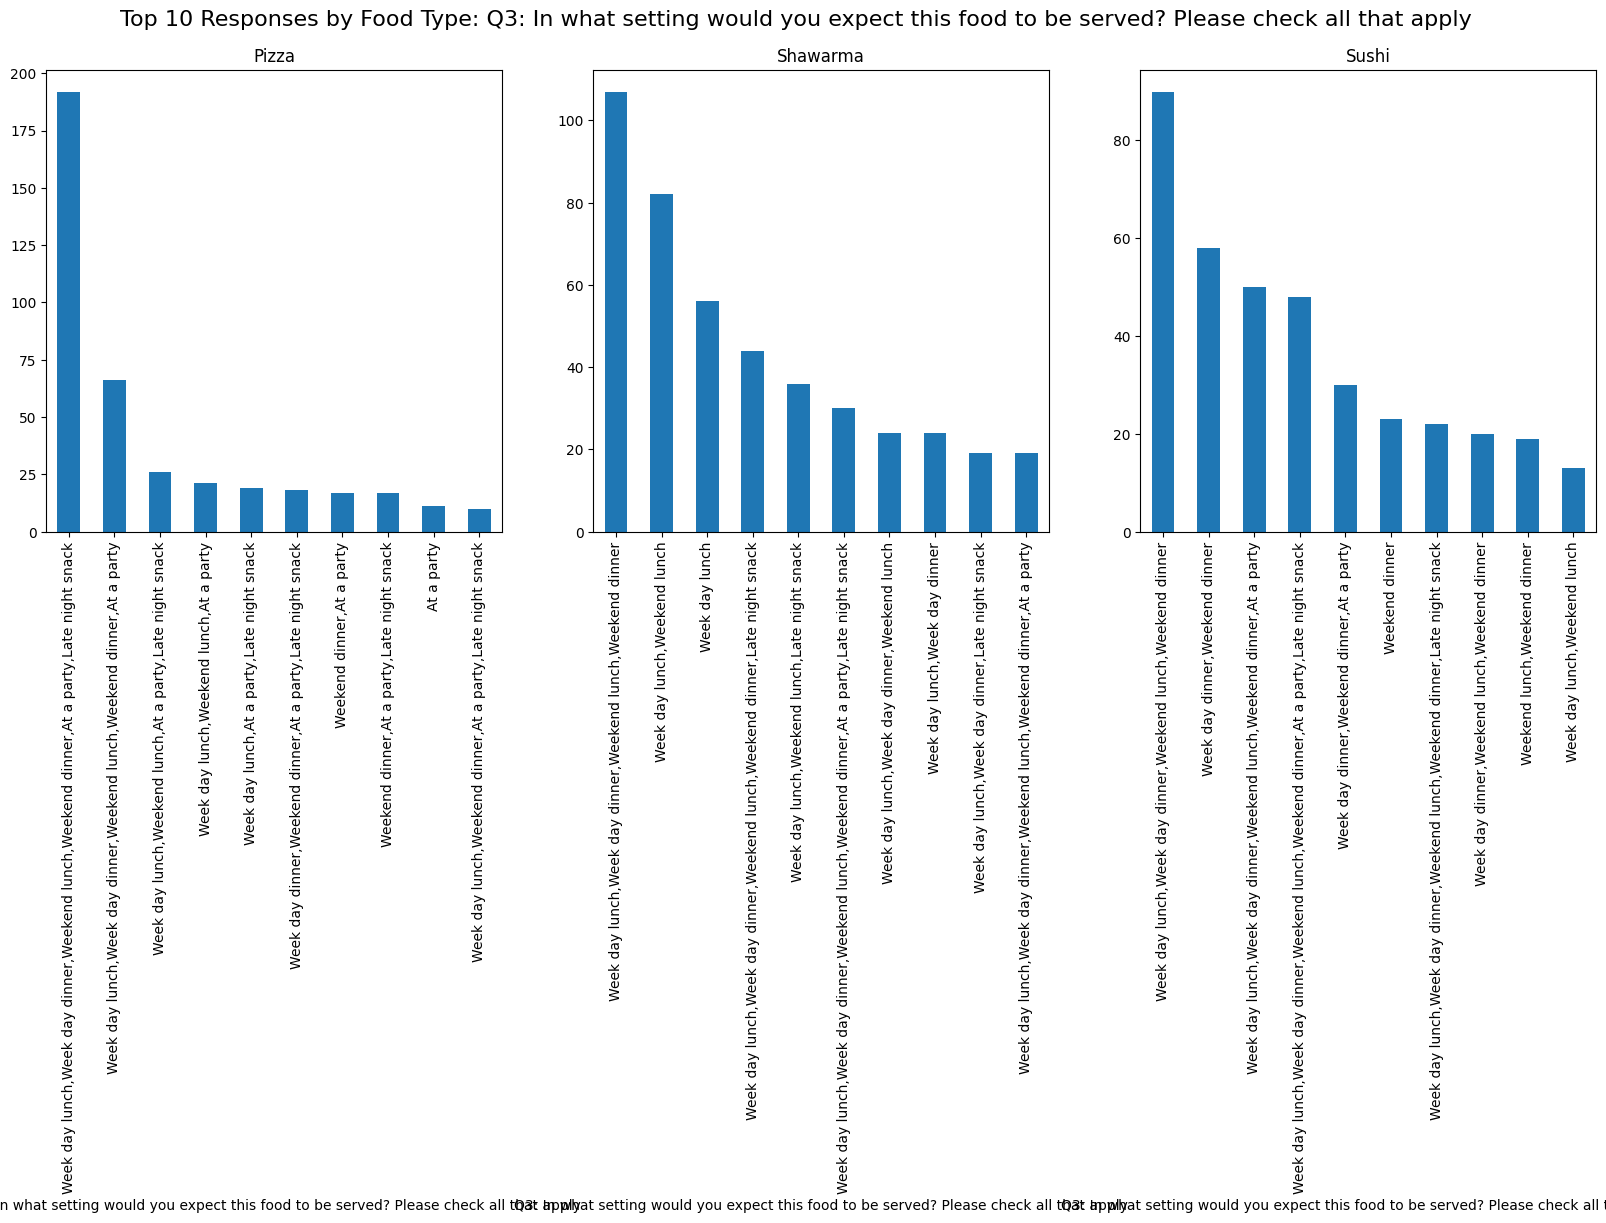

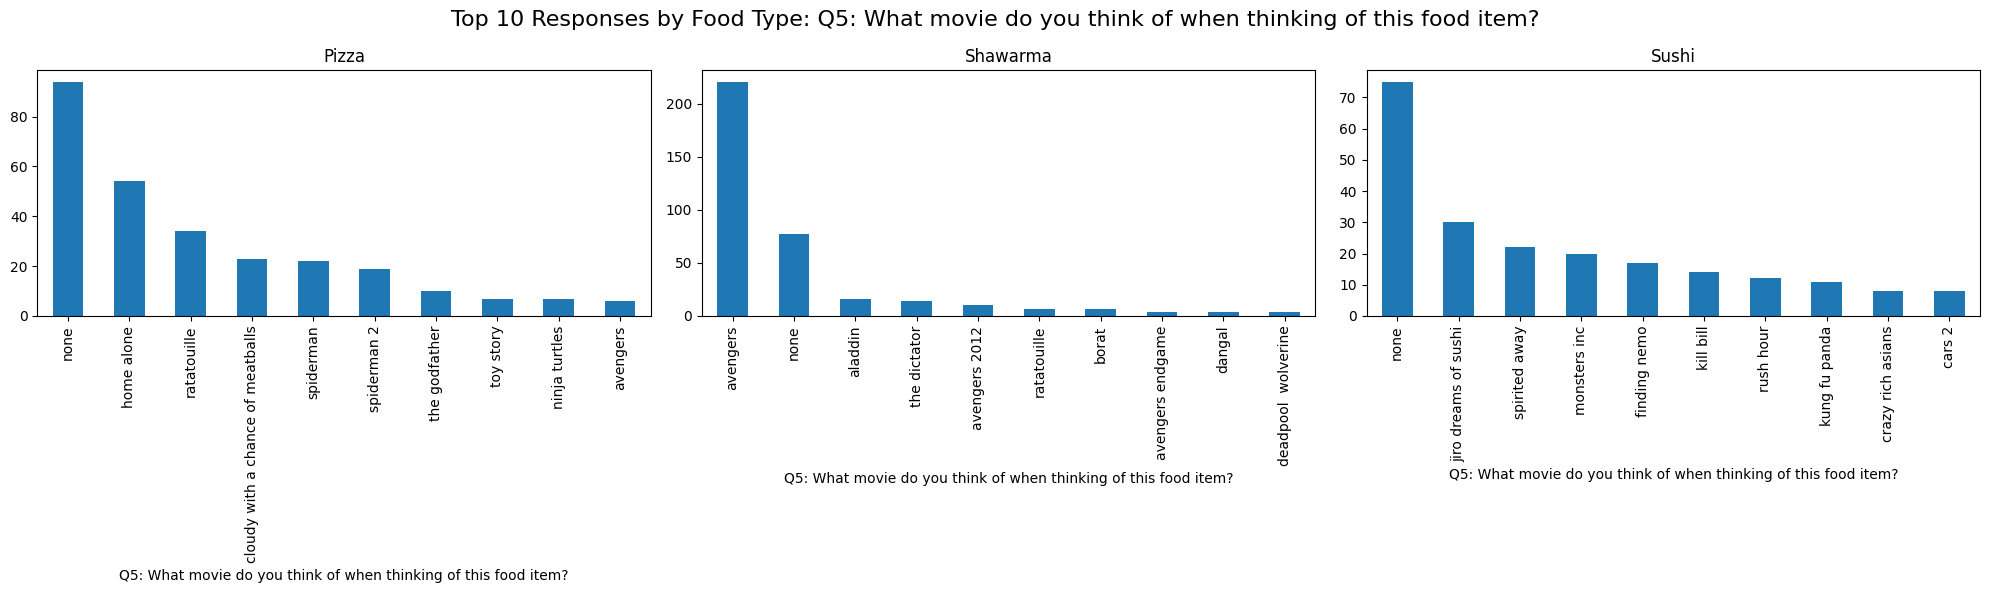

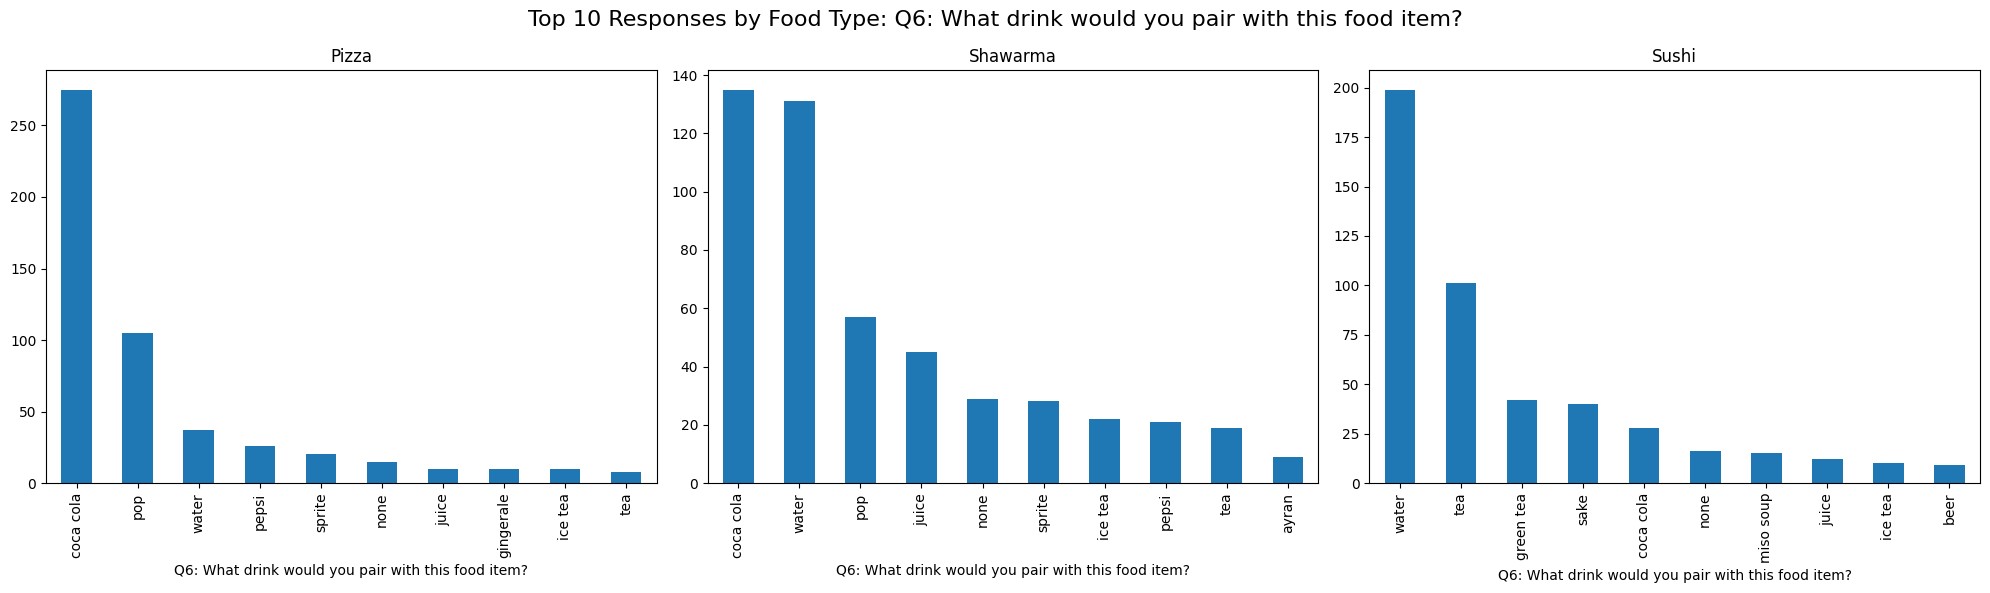

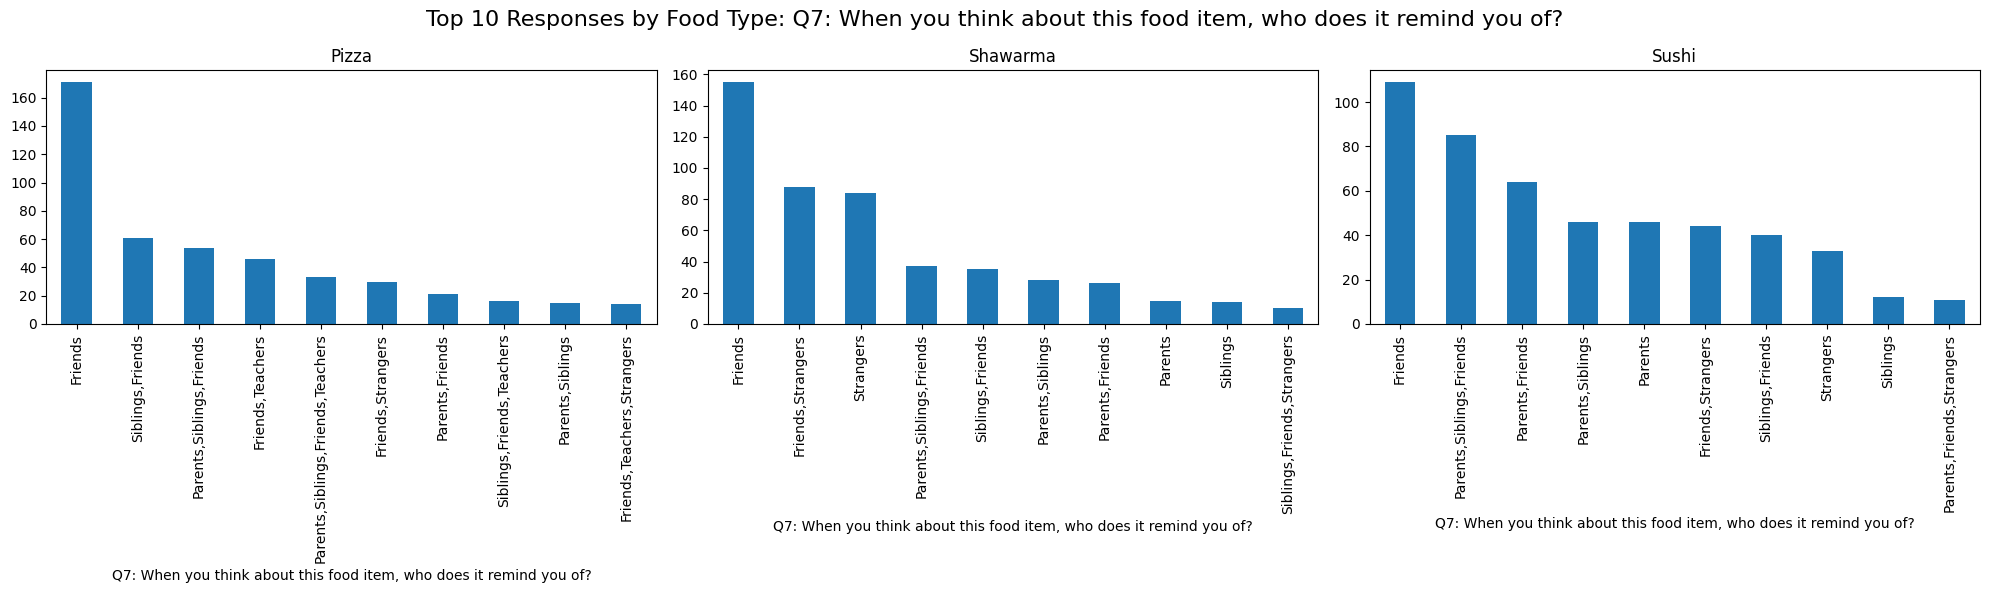

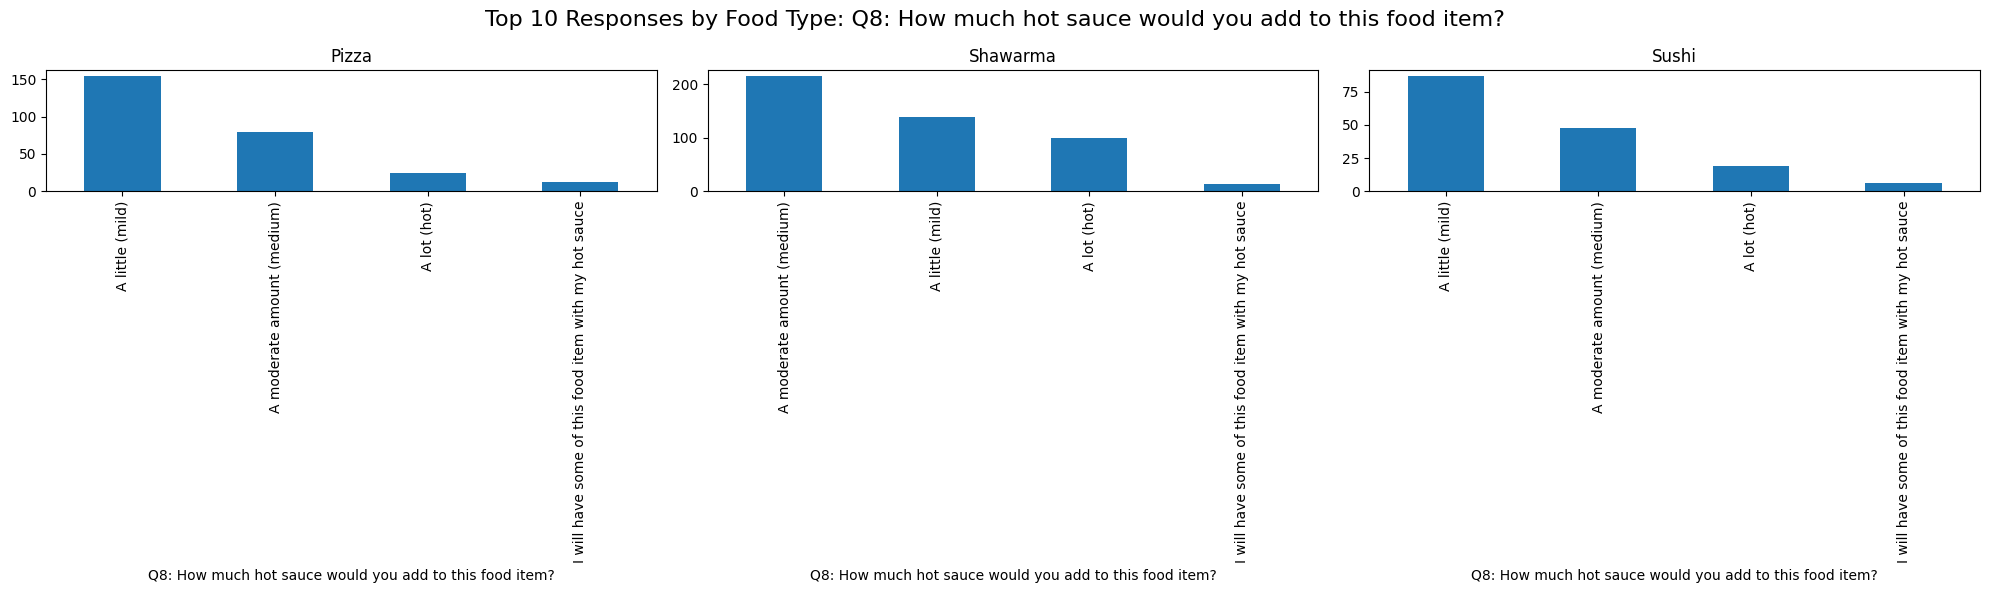

In [25]:
# Movies
# Visualize all categorical columns
categorical_columns = [3, 5, 6, 7, 8]

# Get the unique food labels
labels = data["Label"].unique()

# Create a visualization for each categorical column
for col_idx in categorical_columns:
    column = data.columns[col_idx]  # Get the actual column name directly from DataFrame
    
    # Create subplots - one for each food label
    fig, axes = plt.subplots(1, len(labels), figsize=(20, 6))
    fig.suptitle(f"Top 10 Responses by Food Type: {column}", fontsize=16)
    
    # Loop through labels and create each subplot
    for i, label in enumerate(labels):
        # Get the top 10 responses for this food item and column
        top_responses = data[data["Label"] == label][column].value_counts().head(10)
        
        # Plot as bar chart in the corresponding subplot
        top_responses.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{label}")
        
        # Only show y-label for the first subplot to reduce redundancy
        if i > 0:
            axes[i].set_ylabel("")
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()


<Figure size 800x600 with 0 Axes>

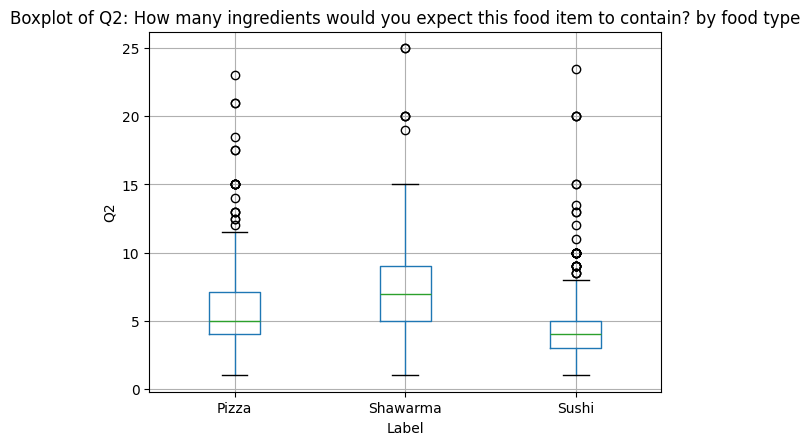

<Figure size 800x600 with 0 Axes>

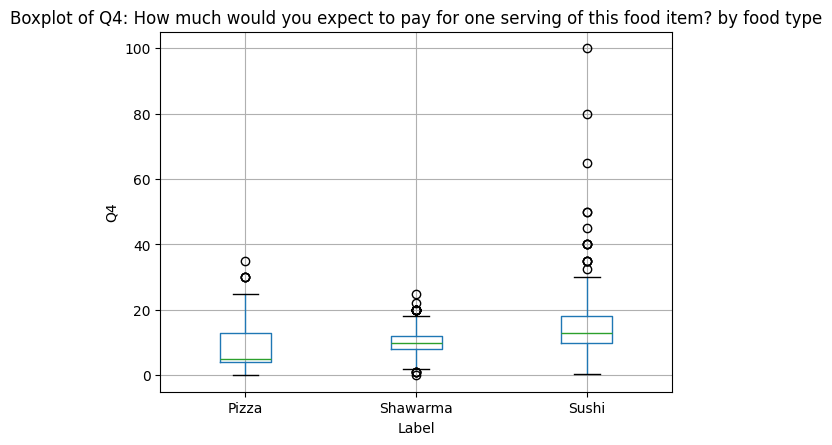

In [ ]:
# Do a box plot for each numerical column
numerical_columns = [2, 4]
for i in numerical_columns:
    plt.figure(figsize=(8, 6))
    column_name = data.columns[i]
    data.boxplot(column=column_name, by='Label')
    plt.title(f"Boxplot of {column_name} by food type")
    plt.suptitle("")  # Remove the default suptitle
    plt.ylabel(column_name.split(':')[0])
    plt.show()